# Credit Risk Modeling

### This capstone project aims to use credit modeling to predict a borrower's default risk, which is targeted towards lenders to provide visibility when deciding whether to extend a loan to the borrower or not. This financial lending csv data set is derived from https://www.lendingclub.com/

1. What is your problem statement?  What will you actually be doing?
2. Who is your audience?  Why will they care?
3. What is your success metric?  How will you know if you are actually solving the problem in a useful way?
4. What is your data source?  What format is your data in?  How much cleaning and munging will be required?
5. What are potential challenges or obstacles and how will you mitigate them?
6. Is this a reasonable project given the time constraints that you have?


- Specific: 
  - What precisely do you plan to do? Build a airline ticket price recommender to increase total revenue
  - What type of model will you need to develop?
- Measurable: 
  - What metrics will you be using to assess performance? 
  - MSE? Accuracy? Precision? AUC?
- Achievable: 
  - Is your project appropriately scoped? Appropriately scoped
  - Is it too aggressive?  Too easy? Moderatedly difficult
  - *Note:* If your project is too big, break it up into smaller pieces.  Sometimes a good project is the simply one part of a larger, longer-term agenda.
- Relevant:
  - Does anyone care about this? Yes, travel businesses such as airlines, hotels and its complementaries
  - Why should people be interested in your results? To improve their business bottom line performance
  - What value will the completion of your project be adding? More revenue implies more profits and market share
- Time-bound
  - What's your deadline? 23 April 2020


1. Do you have data fully in hand and if not, what blockers are you facing? 
https://www.transtats.bts.gov/Tables.asp?DB_ID=125&DB_Name=Airline%20Origin%20and%20Destination%20Survey%20%28DB1B%29&DB_Short_Name=Origin%20and%20Destination%20Survey
https://www.kaggle.com/zernach/2018-airplane-flights
2. Have you done a full EDA on all of your data?
3. Have you begun the modeling process? How accurate are your predictions so far?
4. What blockers are you facing, including processing power, data acquisition, modeling difficulties, data cleaning, etc.? How can we help you overcome those challenges?
5. Have you changed topics since your lightning talk? Since you submitted your Problem Statement and EDA? If so, do you have the necessary data in hand (and the requisite EDA completed) to continue moving forward?
6. What is your timeline for the next week and a half? What do you _have_ to get done versus what would you _like_ to get done?
7. What topics do you want to discuss during your 1:1?

**BAD**: I will model emergency room visits.
- **GOOD**: I will build a regression model to predict the number of daily emergency room visits for St. Someone's Hospital.  Model performance will be guided by RMSE, and the model should at least improve upon baseline by 10%.  Baseline is defined as the monthly average of visits over the last 10 years.

---

- **BAD**: I will investigate the aftermarket pricing of sneakers.
- **GOOD**: Specific image and text features of sports sneakers are predictive of determinding wether they will sell for more or less in the aftermarket.  The guiding metric will be area under the ROC curve.

---

- **BAD**: I will explore the link between obesity and blood pressure.
- **GOOD**: I will quantify the association between obesity and blood pressure through regression modeling.
- **BETTER**: As obesity increases, how does blood pressure change?
---

- **BAD**: I will predict that sources of news are liberal or conservative.
- **GOOD**:  I will look at text features to undersatnd how news can be classified as liberal or conservative.
- **BETTER**: Specific text feature frequencies can determine the broader category of news sources using classification.  I will describe what makes each class charactitaristically unique, describe what is both certain and uncertain using precision and recall as success metrics.  Then I will conclude with a description of "why" my model describes potential to predict these two categories.

---

## Data Guidelines

What should you thinking about and looking for as you collect your capstone data?

- Source and format your data
  - Have a way to save data locally (e.g., SQL or CSV), especially if scraping from the web or collecting from an API.
  - Create a data dictionary to accompany your data.
- Perform initial cleaning and munging.
  - Organize your data relevant to your project goals.
  - Write functions to automatically clean and munge data as necessary.
  - Take copious notes, for both others and yourself, describing your assumptions and approach.


## EDA Guidelines

Think about the following as you perform your initial EDA.

- Identify the data types you are working with.
- Examine the distributions of your data, numerically and/or visually.
- Identify outliers.
- Identify missing data and look for patterns of missing data.
- Describe how your EDA will inform your modeling decisions and process.

## Necessary Deliverables / Submission

 Materials must be presented in a Jupyter Notebook stored within a repository on your personal (*not* GA) GitHub. Please submit a link to this repository by the due date ([submission link](https://forms.gle/P8VK1kGDYS8FLdUD8)).
 
### BONUS

- Create roadmap of your project with milestones.
- Write a blog post on what you learned from your EDA.
 
## Useful Resources
 
- [Best practices for data documentation](https://www.dataone.org/all-best-practices) 
- [Describing data visually](http://www.statisticsviews.com/details/feature/6314441/Visualising-Statistics-The-importance-of-seeing-not-just-describing-data.html)
- [WSJ Guide to Information Graphics (book)](https://www.amazon.com/Street-Journal-Guide-Information-Graphics/dp/0393347281)
- [Storytelling with Data (book)](https://www.amazon.com/Storytelling-Data-Visualization-Business-Professionals/dp/1119002257/)


## Requirements

One 15 minute presentation given to your fellow classmates and well-wishers.  This presentation should be geared for a *non-technical* audience.

## Useful Resources

- [Visual Analysis Best Practices](https://drive.google.com/file/d/0Bx2SHQGVqWasWUpNX28yMTVuS1U/view)
- [Importance of Storytelling with Data](https://drive.google.com/file/d/0Bx2SHQGVqWasTmhYM1FHX3JfNEU/view)
- [Sample Projects](https://gallery.generalassemb.ly/DS?metro=)


https://timoelliott.com/blog/2017/06/from-understanding-big-data-to-monetizing-it.html

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, Lasso, RidgeCV, Ridge
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
loans_2007 = pd.read_csv("../data/loans_2007.csv")

C:\Users\retro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|object|all|A unique LC assigned ID for the loan listing|
|member_id|float64|all|A unique LC assigned Id for the borrower member|
|loan_amnt|float64|all|The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
|funded_amnt|float64|all|The total amount committed to that loan at that point in time|
|funded_amnt_inv|float64|all|The total amount committed by investors for that loan at that point in time.|
|term|object|all|The number of payments on the loan. Values are in months and can be either 36 or 60|
|int_rate|object|all|Interest Rate on the loan|
|installment|float64|all|The monthly payment owed by the borrower if the loan originates.|
|grade|object|all|LC assigned loan grade|
|sub_grade|object|all|LC assigned loan subgrade|
|emp_title|object|all|The job title supplied by the Borrower when applying for the loan|
|emp_length|object|all|Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years|
|home_ownership|object|all|The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER|
|annual_inc|float64|all|The self-reported annual income provided by the borrower during registration.|
|verification_status|object|all|Indicates if income was verified by LC, not verified, or if the income source was verified|
|issue_d|object|all|The month which the loan was funded|
|loan_status|object|all|Current status of the loan|
|pymnt_plan|object|all|Indicates if a payment plan has been put in place for the loan|
|purpose|object|all|A category provided by the borrower for the loan request|
|title|object|all|The loan title provided by the borrower|
|zip_code|object|all|The first 3 numbers of the zip code provided by the borrower in the loan application.|
|addr_state|object|all|The state provided by the borrower in the loan application|
|dti|float64|all|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income|
|delinq_2yrs|float64|all|The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years|
|earliest_cr_line|object|all|The month the borrower's earliest reported credit line was opened|
|inq_last_6mths|float64|all|The number of inquiries in past 6 months (excluding auto and mortgage inquiries)|
|open_acc|float64|all|The number of open credit lines in the borrower's credit file|
|pub_rec|float64|all|Number of derogatory public records|
|revol_bal|float64|all|Total credit revolving balance|
|revol_util|object|all|Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit|
|total_acc|float64|all|The total number of credit lines currently in the borrower's credit file|
|initial_list_status|object|all|The initial listing status of the loan. Possible values are – W, F|
|out_prncp|float64|all|Remaining outstanding principal for total amount funded|
|out_prncp_inv|float64|all|Remaining outstanding principal for portion of total amount funded by investors|
|total_pymnt|float64|all|Payments received to date for total amount funded|
|total_pymnt_inv|float64|all|Payments received to date for portion of total amount funded by investors|
|total_rec_prncp|float64|all|Principal received to date|
|total_rec_int|float64|all|Interest received to date|
|total_rec_late_fee|float64|all|Late fees received to date|
|recoveries|float64|all|post charge off gross recovery|
|collection_recovery_fee|float64|all|post charge off collection fee|
|last_pymnt_d|object|all|Last month payment was received|
|last_pymnt_amnt|float64|all|Last total payment amount received|
|last_credit_pull_d|object|all|The most recent month LC pulled credit for this loan|
|collections_12_mths_ex_med|float64|all|Number of collections in 12 months excluding medical collections|
|policy_code|float64|all|publicly available policy_code=1new products not publicly available policy_code=2|
|application_type|object|all|Indicates whether the loan is an individual application or a joint application with two co-borrowers|
|acc_now_delinq|float64|all|The number of accounts on which the borrower is now delinquent|
|chargeoff_within_12_mths|float64|all|Number of charge-offs within 12 months|
|delinq_amnt|float64|all|The past-due amount owed for the accounts on which the borrower is now delinquent|
|pub_rec_bankruptcies|float64|all|Number of public record bankruptcies|
|tax_liens|float64|all|Number of tax liens|

### Data Cleaning and EDA

In [3]:
#Display data types
loans_2007.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

In [4]:
#Display first row
print(loans_2007.iloc[1])

id                                    1077430
member_id                         1.31417e+06
loan_amnt                                2500
funded_amnt                              2500
funded_amnt_inv                          2500
term                                60 months
int_rate                               15.27%
installment                             59.83
grade                                       C
sub_grade                                  C4
emp_title                               Ryder
emp_length                           < 1 year
home_ownership                           RENT
annual_inc                              30000
verification_status           Source Verified
issue_d                              Dec-2011
loan_status                       Charged Off
pymnt_plan                                  n
purpose                                   car
title                                    bike
zip_code                                309xx
addr_state                        

In [5]:
#Display data head
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [6]:
#Display data tail
loans_2007.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 471701350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop last two rows full of  NaN   
loans_2007 = loans_2007.drop(loans_2007.tail(2).index)

In [8]:
#Display data tail to confirm last two rows dropped
loans_2007.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,0.00,Feb-2013,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,32.41,Sep-2014,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN


In [9]:
#Check for missing values
loans_2007.isnull().sum()

id                               0
member_id                        1
loan_amnt                        1
funded_amnt                      1
funded_amnt_inv                  1
term                             1
int_rate                         1
installment                      1
grade                            1
sub_grade                        1
emp_title                     2627
emp_length                    1113
home_ownership                   1
annual_inc                       5
verification_status              1
issue_d                          1
loan_status                      1
pymnt_plan                       1
purpose                          1
title                           14
zip_code                         1
addr_state                       1
dti                              1
delinq_2yrs                     30
earliest_cr_line                30
inq_last_6mths                  30
open_acc                        30
pub_rec                         30
revol_bal           

In [10]:
#Drop rows with na
loans_2007 = loans_2007.dropna()

In [11]:
#Determine if there are missing values remaining
null_counts = loans_2007.isnull().sum()
print(null_counts[null_counts>0])

Series([], dtype: int64)


In [12]:
#Display data shape
loans_2007.shape

(38433, 52)

In [13]:
#Display data type of each column
loans_2007.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

In [14]:
#Overview of each numeric feature
summary = loans_2007.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
member_id,38433.0,845616.404808,259362.768645,91027.00,659589.000000,835278.000000,1.040501e+06,1.314167e+06
loan_amnt,38433.0,11212.482112,7397.281223,500.00,5500.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,38433.0,10939.748393,7133.601314,500.00,5450.000000,9700.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,38433.0,10450.550024,7062.157477,0.00,5000.000000,9000.000000,1.440000e+04,3.500000e+04
installment,38433.0,324.711286,207.358219,15.67,168.090000,280.970000,4.306200e+02,1.305190e+03
annual_inc,38433.0,69535.068669,63531.932108,3300.00,42000.000000,60000.000000,8.300000e+04,6.000000e+06
dti,38433.0,13.507810,6.665663,0.00,8.400000,13.610000,1.877000e+01,2.999000e+01
delinq_2yrs,38433.0,0.149793,0.503078,0.00,0.000000,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,38433.0,1.036765,1.383006,0.00,0.000000,1.000000,2.000000e+00,1.700000e+01
open_acc,38433.0,9.405225,4.434018,1.00,6.000000,9.000000,1.200000e+01,4.600000e+01


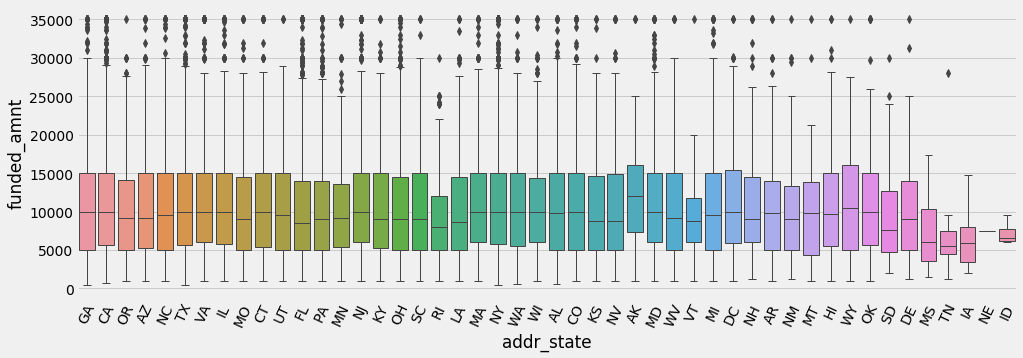

In [15]:
#The loans seems to be pretty evenly distributed across all states except Nebraska(NE) which is non existent
#The state of Idaho(ID), Iowa(IA), Tennessee(TN) and Mississippi(MS) are well below the median distribution
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax = sns.boxplot(x="addr_state", y="funded_amnt", data=loans_2007, linewidth=1.0);
plt.xticks(rotation=65);

In [16]:
#Dropping unnecessary columns
loans_2007.drop(['id', 
                 'member_id', 
                 'grade', 
                 'sub_grade', 
                 'emp_title', 
                 'issue_d', 
                 'title', 
                 'zip_code',
                 'addr_state',
                 'earliest_cr_line', 
                 'last_pymnt_d', 
                 'last_credit_pull_d',
                 'pub_rec_bankruptcies'], axis = 1,inplace=True)

In [17]:
#Display first row
print(loans_2007.iloc[0])

loan_amnt                                2500
funded_amnt                              2500
funded_amnt_inv                          2500
term                                60 months
int_rate                               15.27%
installment                             59.83
emp_length                           < 1 year
home_ownership                           RENT
annual_inc                              30000
verification_status           Source Verified
loan_status                       Charged Off
pymnt_plan                                  n
purpose                                   car
dti                                         1
delinq_2yrs                                 0
inq_last_6mths                              5
open_acc                                    3
pub_rec                                     0
revol_bal                                1687
revol_util                               9.4%
total_acc                                   4
initial_list_status               

In [18]:
#Remove all rows from loans_2007 that contain values other than Fully Paid or Charged Off for the loan_status column
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

In [19]:
#Remove any columns from loans_2007 that contain only one unique value
orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [20]:
#select columns of object type from loans and assign the Dataframe object_columns_df
object_columns_df = loans.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                         60 months
int_rate                        15.27%
emp_length                    < 1 year
home_ownership                    RENT
verification_status    Source Verified
purpose                            car
revol_util                        9.4%
Name: 1, dtype: object


In [21]:
#Display the unique value counts for cols
cols = ['home_ownership', 'verification_status', 'emp_length', 'term']
for c in cols:
    print(loans[c].value_counts())

RENT        17132
MORTGAGE    15802
OWN          2520
OTHER          94
Name: home_ownership, dtype: int64
Not Verified       14873
Verified           11454
Source Verified     9221
Name: verification_status, dtype: int64
10+ years    8087
2 years      4098
< 1 year     3996
3 years      3846
4 years      3226
5 years      3057
1 year       2971
6 years      2073
7 years      1645
8 years      1370
9 years      1179
Name: emp_length, dtype: int64
 36 months    26375
 60 months     9173
Name: term, dtype: int64


In [22]:
#Display the columns of unique values
#print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

debt_consolidation    16999
credit_card            4641
other                  3475
home_improvement       2637
major_purchase         1983
car                    1407
small_business         1362
wedding                 869
medical                 623
moving                  524
vacation                333
house                   332
educational             276
renewable_energy         87
Name: purpose, dtype: int64


In [23]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
loans = loans.replace(mapping_dict)

In [24]:
#Encode cat_columns as integer values
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)

In [25]:
#Define function
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)
    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [26]:
#Display data shape/types & summary
details = rstr(loans_2007, 'funded_amnt')
display(details.sort_values(by='corr funded_amnt', ascending=False))

Data shape: (35548, 39)
___________________________
Data types:
 float64    28
object     10
int64       1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr funded_amnt
funded_amnt,float64,35548,1002,0,0.0,"[[2500.0, 10000.0, 5000.0, 7000.0, 3000.0, 537...",1.090469,0.996597,1.000000
loan_amnt,float64,35548,847,0,0.0,"[[2500.0, 10000.0, 5000.0, 7000.0, 3000.0, 537...",1.064377,0.813201,0.981394
funded_amnt_inv,float64,35548,7352,0,0.0,"[[2500.0, 10000.0, 5000.0, 7000.0, 3000.0, 535...",1.111991,1.115678,0.971559
installment,float64,35548,14091,0,0.0,"[[59.83, 339.31, 156.46, 170.08, 109.43, 121.4...",1.135840,1.289596,0.956509
total_pymnt,float64,35548,35447,0,0.0,"[[1008.71, 12231.890000000902, 5632.2099999994...",1.345877,2.050986,0.901723
total_pymnt_inv,float64,35548,33639,0,0.0,"[[1008.71, 12231.89, 5632.21, 10137.84, 3939.1...",1.356552,2.088502,0.878644
total_rec_prncp,float64,35548,6203,0,0.0,"[[456.46, 10000.0, 5000.0, 7000.0, 3000.0, 673...",1.134476,1.180221,0.868325
total_rec_int,float64,35548,31632,0,0.0,"[[435.17, 2214.92, 632.21, 3137.84, 939.14, 53...",2.643870,9.603540,0.736934
last_pymnt_amnt,float64,35548,32120,0,0.0,"[[119.66, 357.48, 161.03, 1313.76, 111.34, 121...",2.623975,8.368839,0.478583
revol_bal,float64,35548,20422,0,0.0,"[[1687.0, 5598.0, 7963.0, 17726.0, 8221.0, 927...",3.155684,14.620959,0.312529


In [27]:
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35548 entries, 1 to 39692
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            35548 non-null  float64
 1   funded_amnt                          35548 non-null  float64
 2   funded_amnt_inv                      35548 non-null  float64
 3   int_rate                             35548 non-null  float64
 4   installment                          35548 non-null  float64
 5   emp_length                           35548 non-null  int64  
 6   annual_inc                           35548 non-null  float64
 7   loan_status                          35548 non-null  int64  
 8   dti                                  35548 non-null  float64
 9   delinq_2yrs                          35548 non-null  float64
 10  inq_last_6mths                       35548 non-null  float64
 11  open_acc                    

In [28]:
#Define function
def plotting(loans, columns, target, num_cols=2):
    fig = plt.figure(figsize=(6*num_cols,4*round(len(columns)/num_cols)))
    for col_number, col_name in enumerate(columns):   
        fig.add_subplot(math.ceil(len(columns)/num_cols), num_cols, col_number + 1)
        if df[col_name].dtype!='object':
            plt.scatter(df[col_name], df[target])
            plt.xlabel(col_name)
            plt.ylabel(target)
        else:
            sns.boxplot(x=target, y=col_name, data=df)            

    fig.tight_layout()

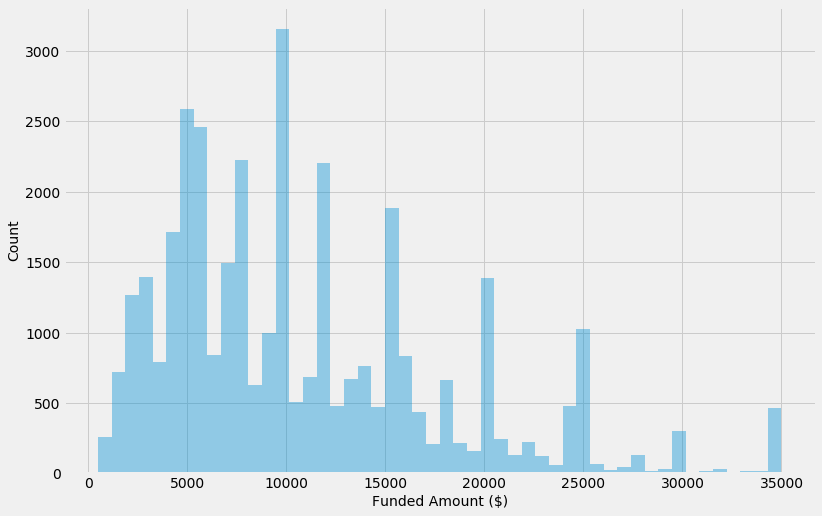

In [29]:
#Plot to examine the target variable: funded_amnt
plt.figure(figsize=(12, 8))
sns.distplot(loans.funded_amnt, kde=False)
plt.xlabel('Funded Amount ($)', size=14)
plt.ylabel('Count', size=14);

In [30]:
#Measure the skewness of distribution
stats.skew(loans["funded_amnt"])

1.0904226868514266

This data are moderately and positively skewed to the right; It has a long tail with its mean is to the right of the mode and median

In [55]:
#Measure the kurtosis of distribution
stats.kurtosis(loans["funded_amnt"])

0.9962877858821741

This belongs to a Platykurtic distribution because its kurtosis is almost one, which is less than 3, thus exhibiting less kurtosis with shorter, thinner tails relative a normal distribution.

In [31]:
#Display numeric correlations between different features and target variable
numeric_features = loans.select_dtypes(include=[np.number])
numeric_features.dtypes

loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
emp_length                               int64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
total_rec_late_fee                     float64
recoveries   

In [32]:
#Determine top predictors of funded_amnt 
corr = numeric_features.corr()
print (corr['funded_amnt'].sort_values(ascending=False)[:10], '\n')
print (corr['funded_amnt'].sort_values(ascending=False)[-10:])

funded_amnt                     1.000000
loan_amnt                       0.981394
funded_amnt_inv                 0.971559
installment                     0.956509
total_pymnt                     0.901723
total_pymnt_inv                 0.878644
total_rec_prncp                 0.868325
total_rec_int                   0.736934
last_pymnt_amnt                 0.478583
verification_status_Verified    0.423794
Name: funded_amnt, dtype: float64 

loan_status                           -0.059470
purpose_vacation                      -0.074431
purpose_moving                        -0.075897
verification_status_Source Verified   -0.098851
purpose_major_purchase                -0.102359
purpose_car                           -0.120815
purpose_other                         -0.142633
home_ownership_RENT                   -0.145971
verification_status_Not Verified      -0.313650
term_ 36 months                       -0.329850
Name: funded_amnt, dtype: float64


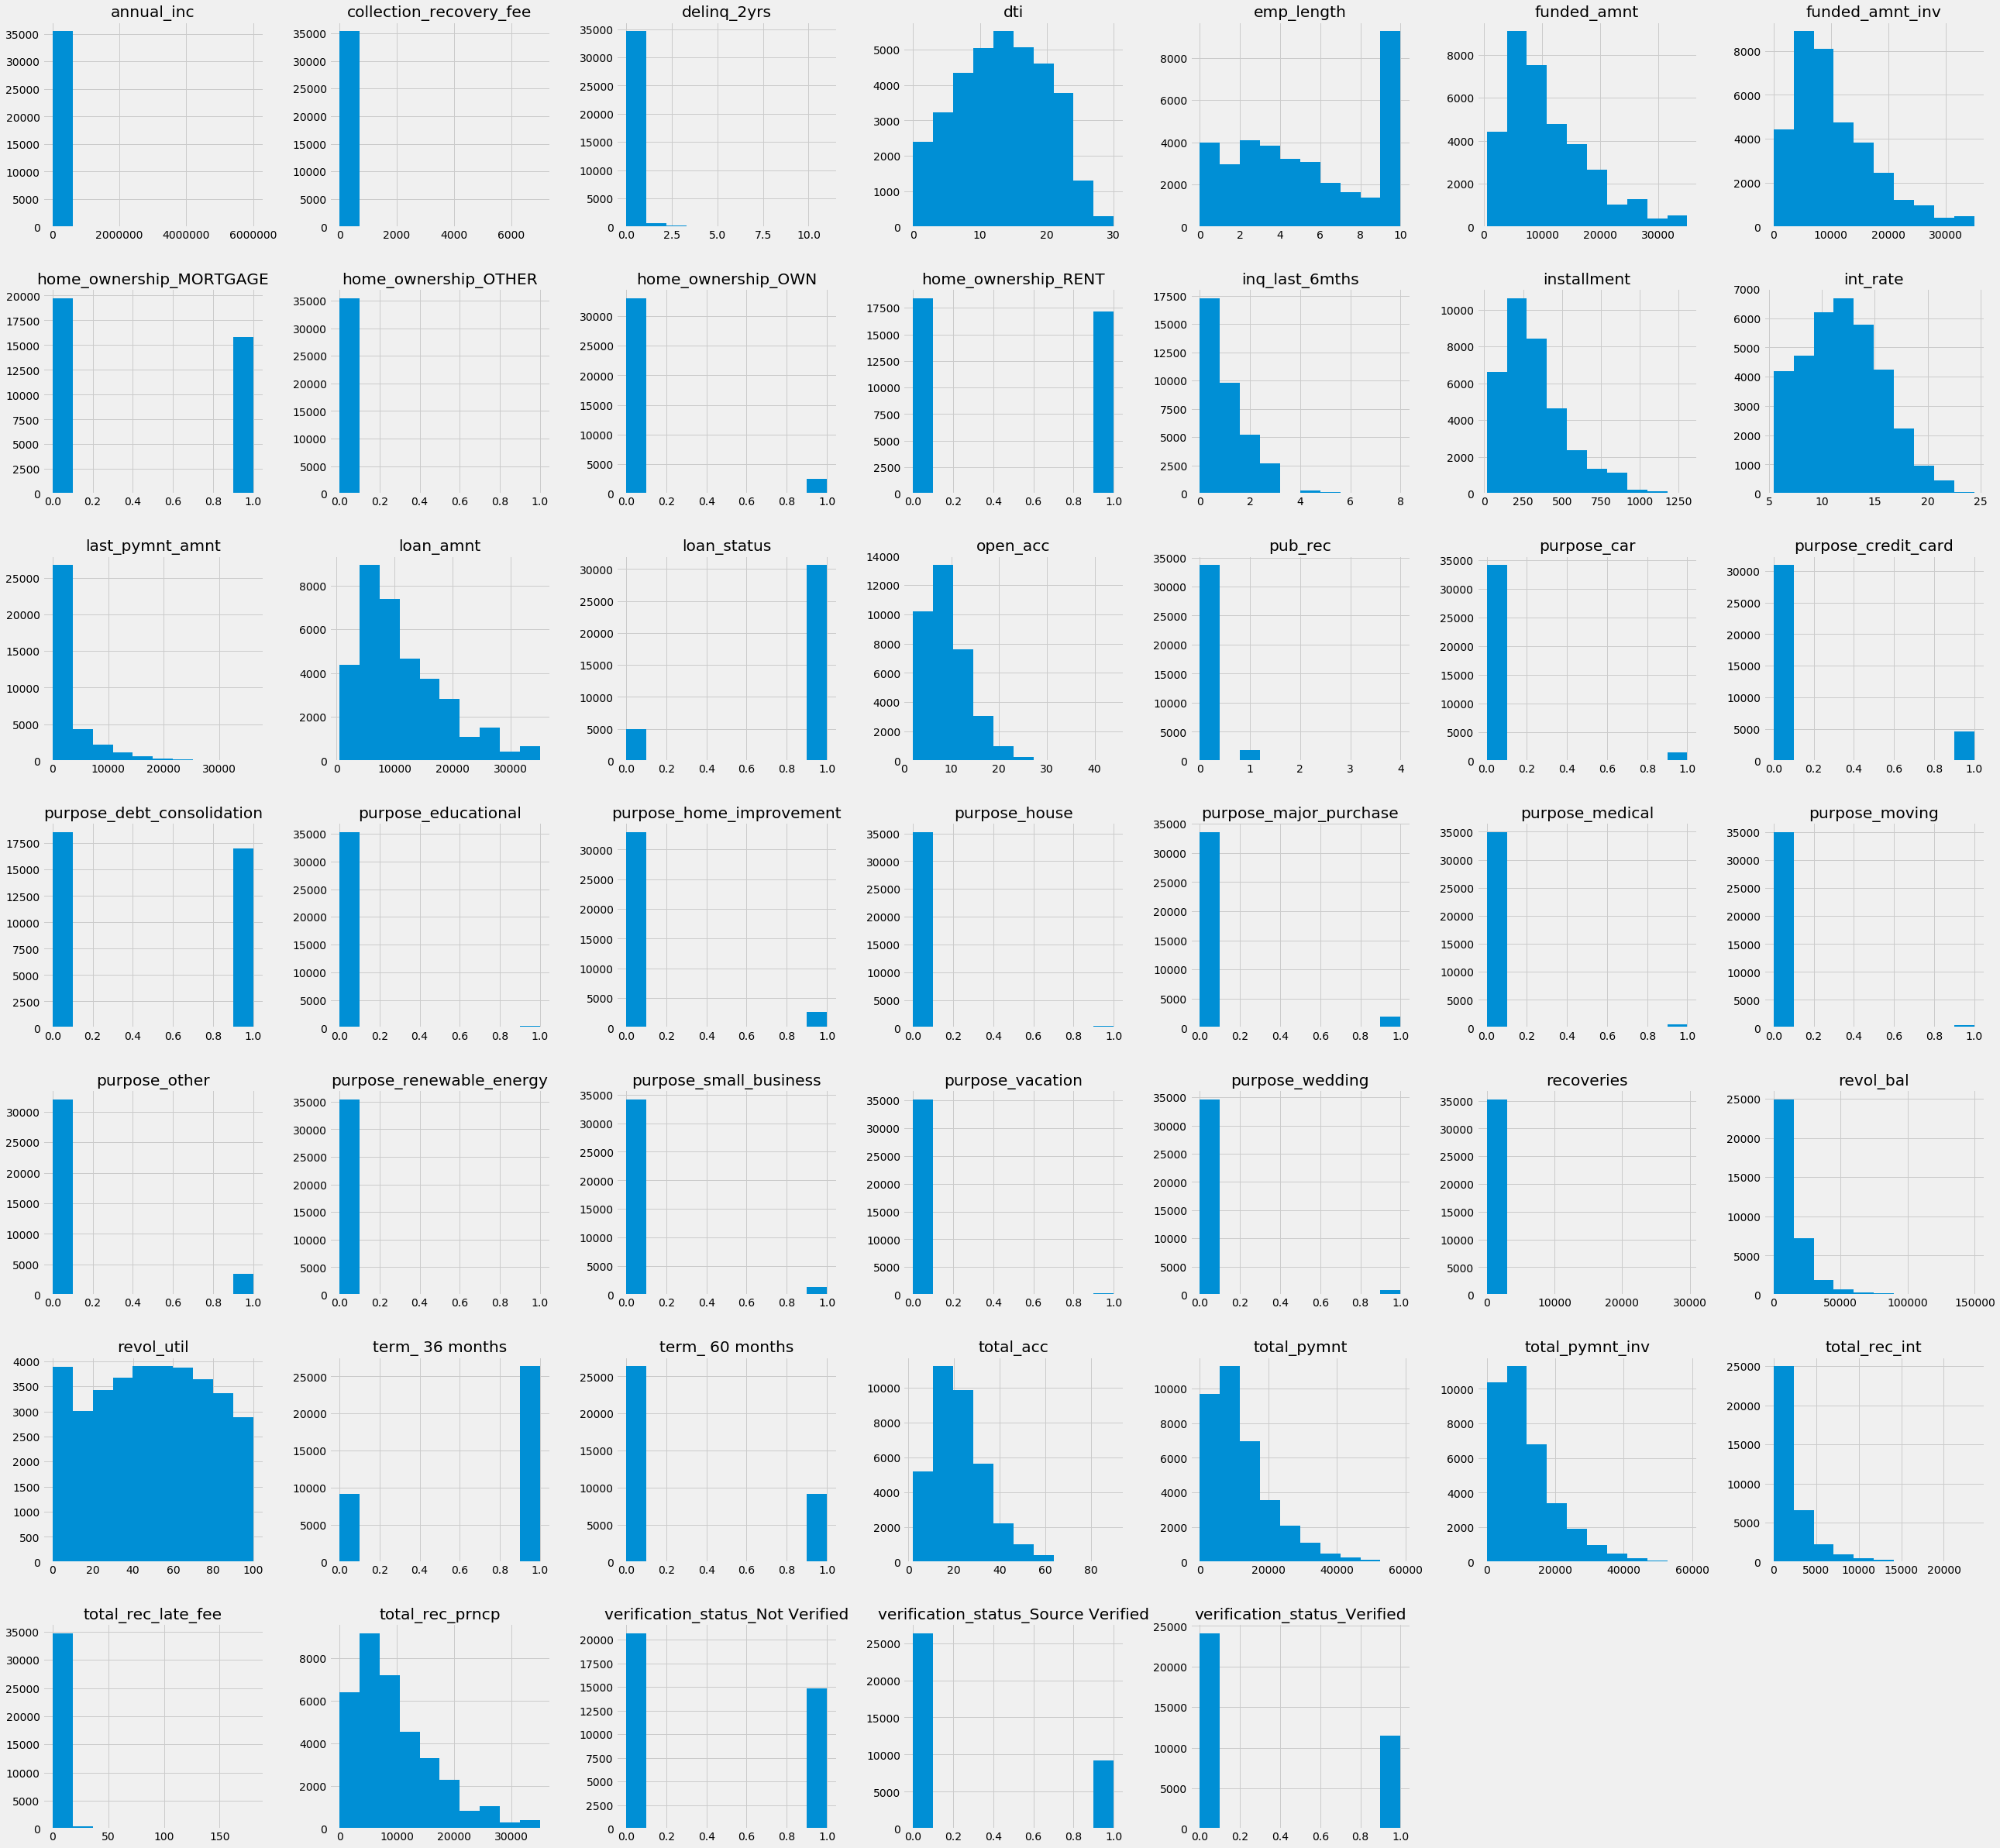

In [33]:
#Create histograms of all numerical columns
loans.hist(figsize=(40, 40));

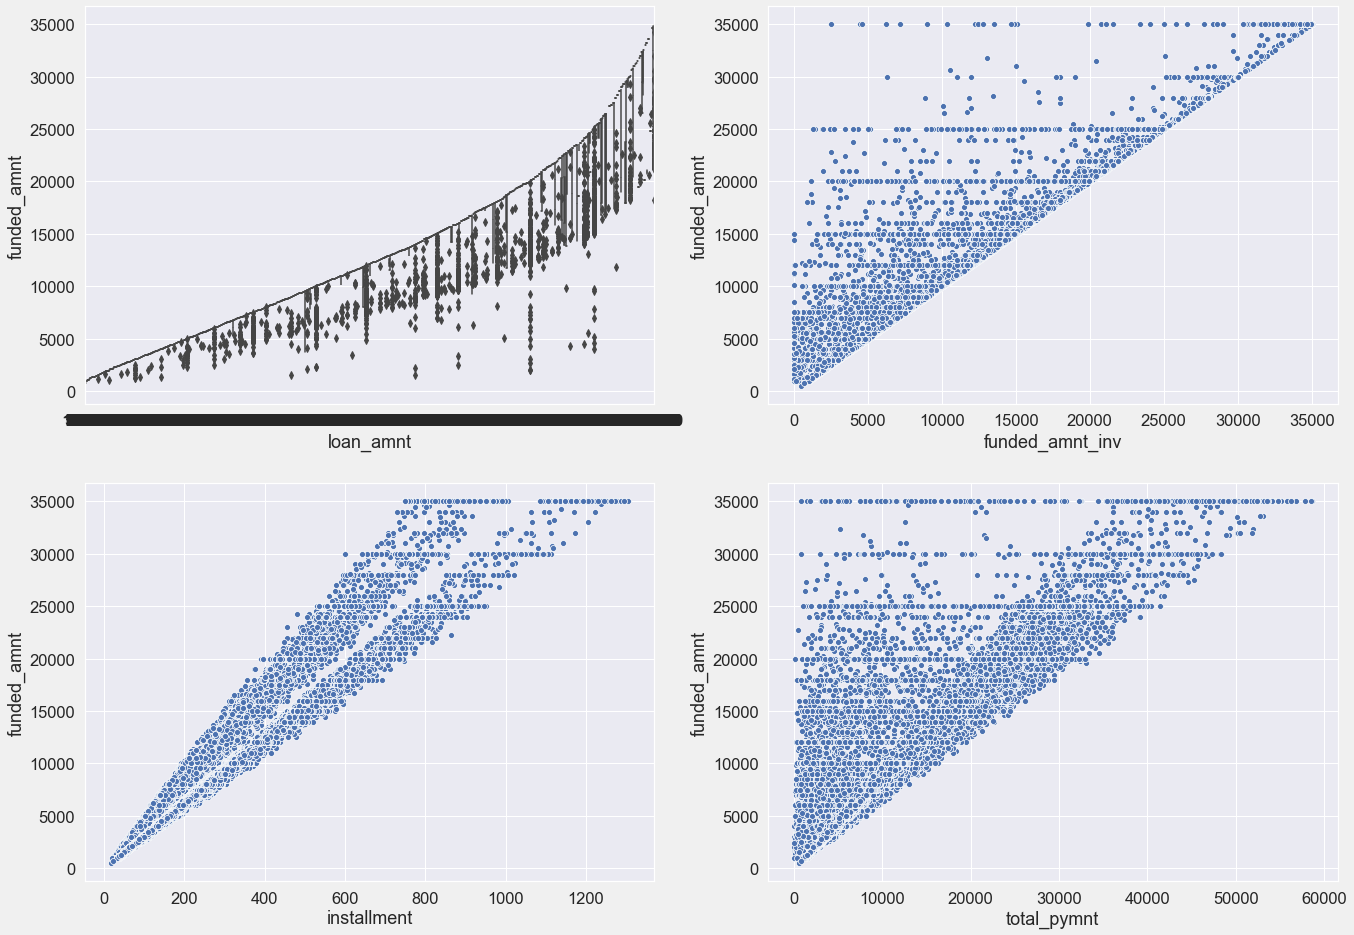

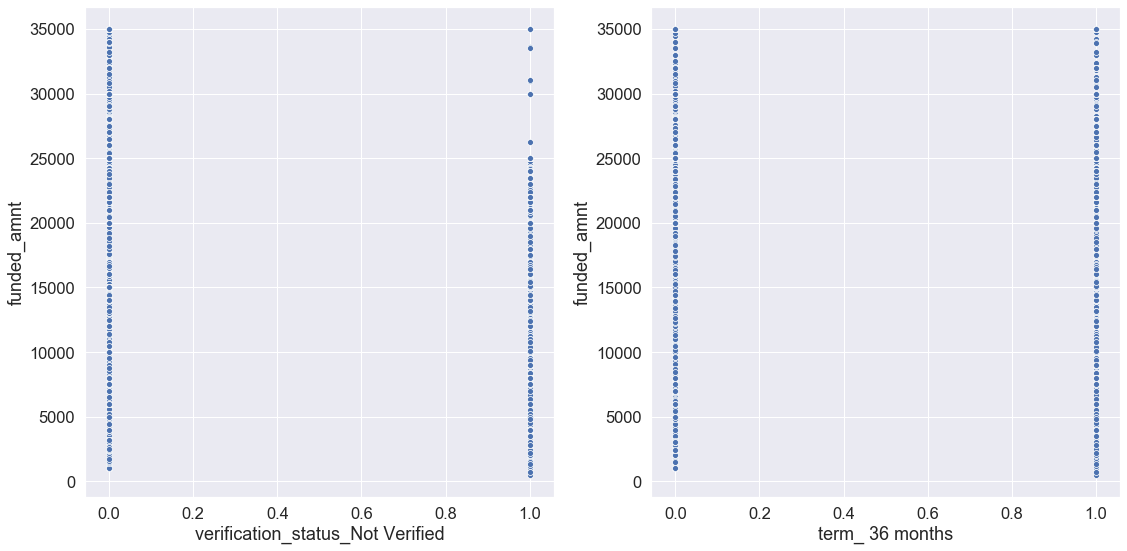

In [34]:
#Display boxplot
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

#Box plot loan_amnt/funded_amnt
fig1 = fig.add_subplot(221); 
sns.boxplot(x='loan_amnt', 
                y='funded_amnt', data=loans[['funded_amnt', 'loan_amnt']])

#funded_amnt_inv vs funded_amnt plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = loans['funded_amnt_inv'], 
                y = loans.funded_amnt, palette= 'Spectral')

#installment vs funded_amnt plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = loans['installment'], 
                y = loans.funded_amnt, palette= 'Spectral')

#total_pymnt vs funded_amnt plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = loans['total_pymnt'], 
                y = loans.funded_amnt, palette= 'Spectral')

#verification_status_Not Verified vs funded_amnt plot
fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = loans.funded_amnt, 
                x = loans['verification_status_Not Verified'], palette= 'YlOrRd')

#term_ 36 months vs funded_amnt plot
fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = loans.funded_amnt, 
                x = loans['term_ 36 months'], palette= 'YlOrRd')

plt.tight_layout(); plt.show()

In [35]:
#Summary of target variable:funded_amnt
loans.funded_amnt.describe()

count    35548.000000
mean     10887.459210
std       7080.112675
min        500.000000
25%       5500.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

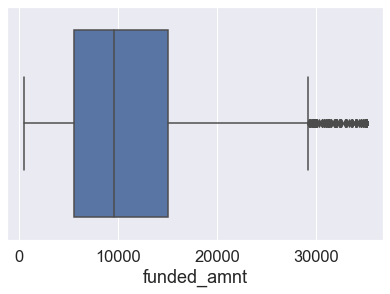

In [36]:
#Boxplot where IQR around 5500 to 15000 and median = 9600
sns.boxplot(loans['funded_amnt'])

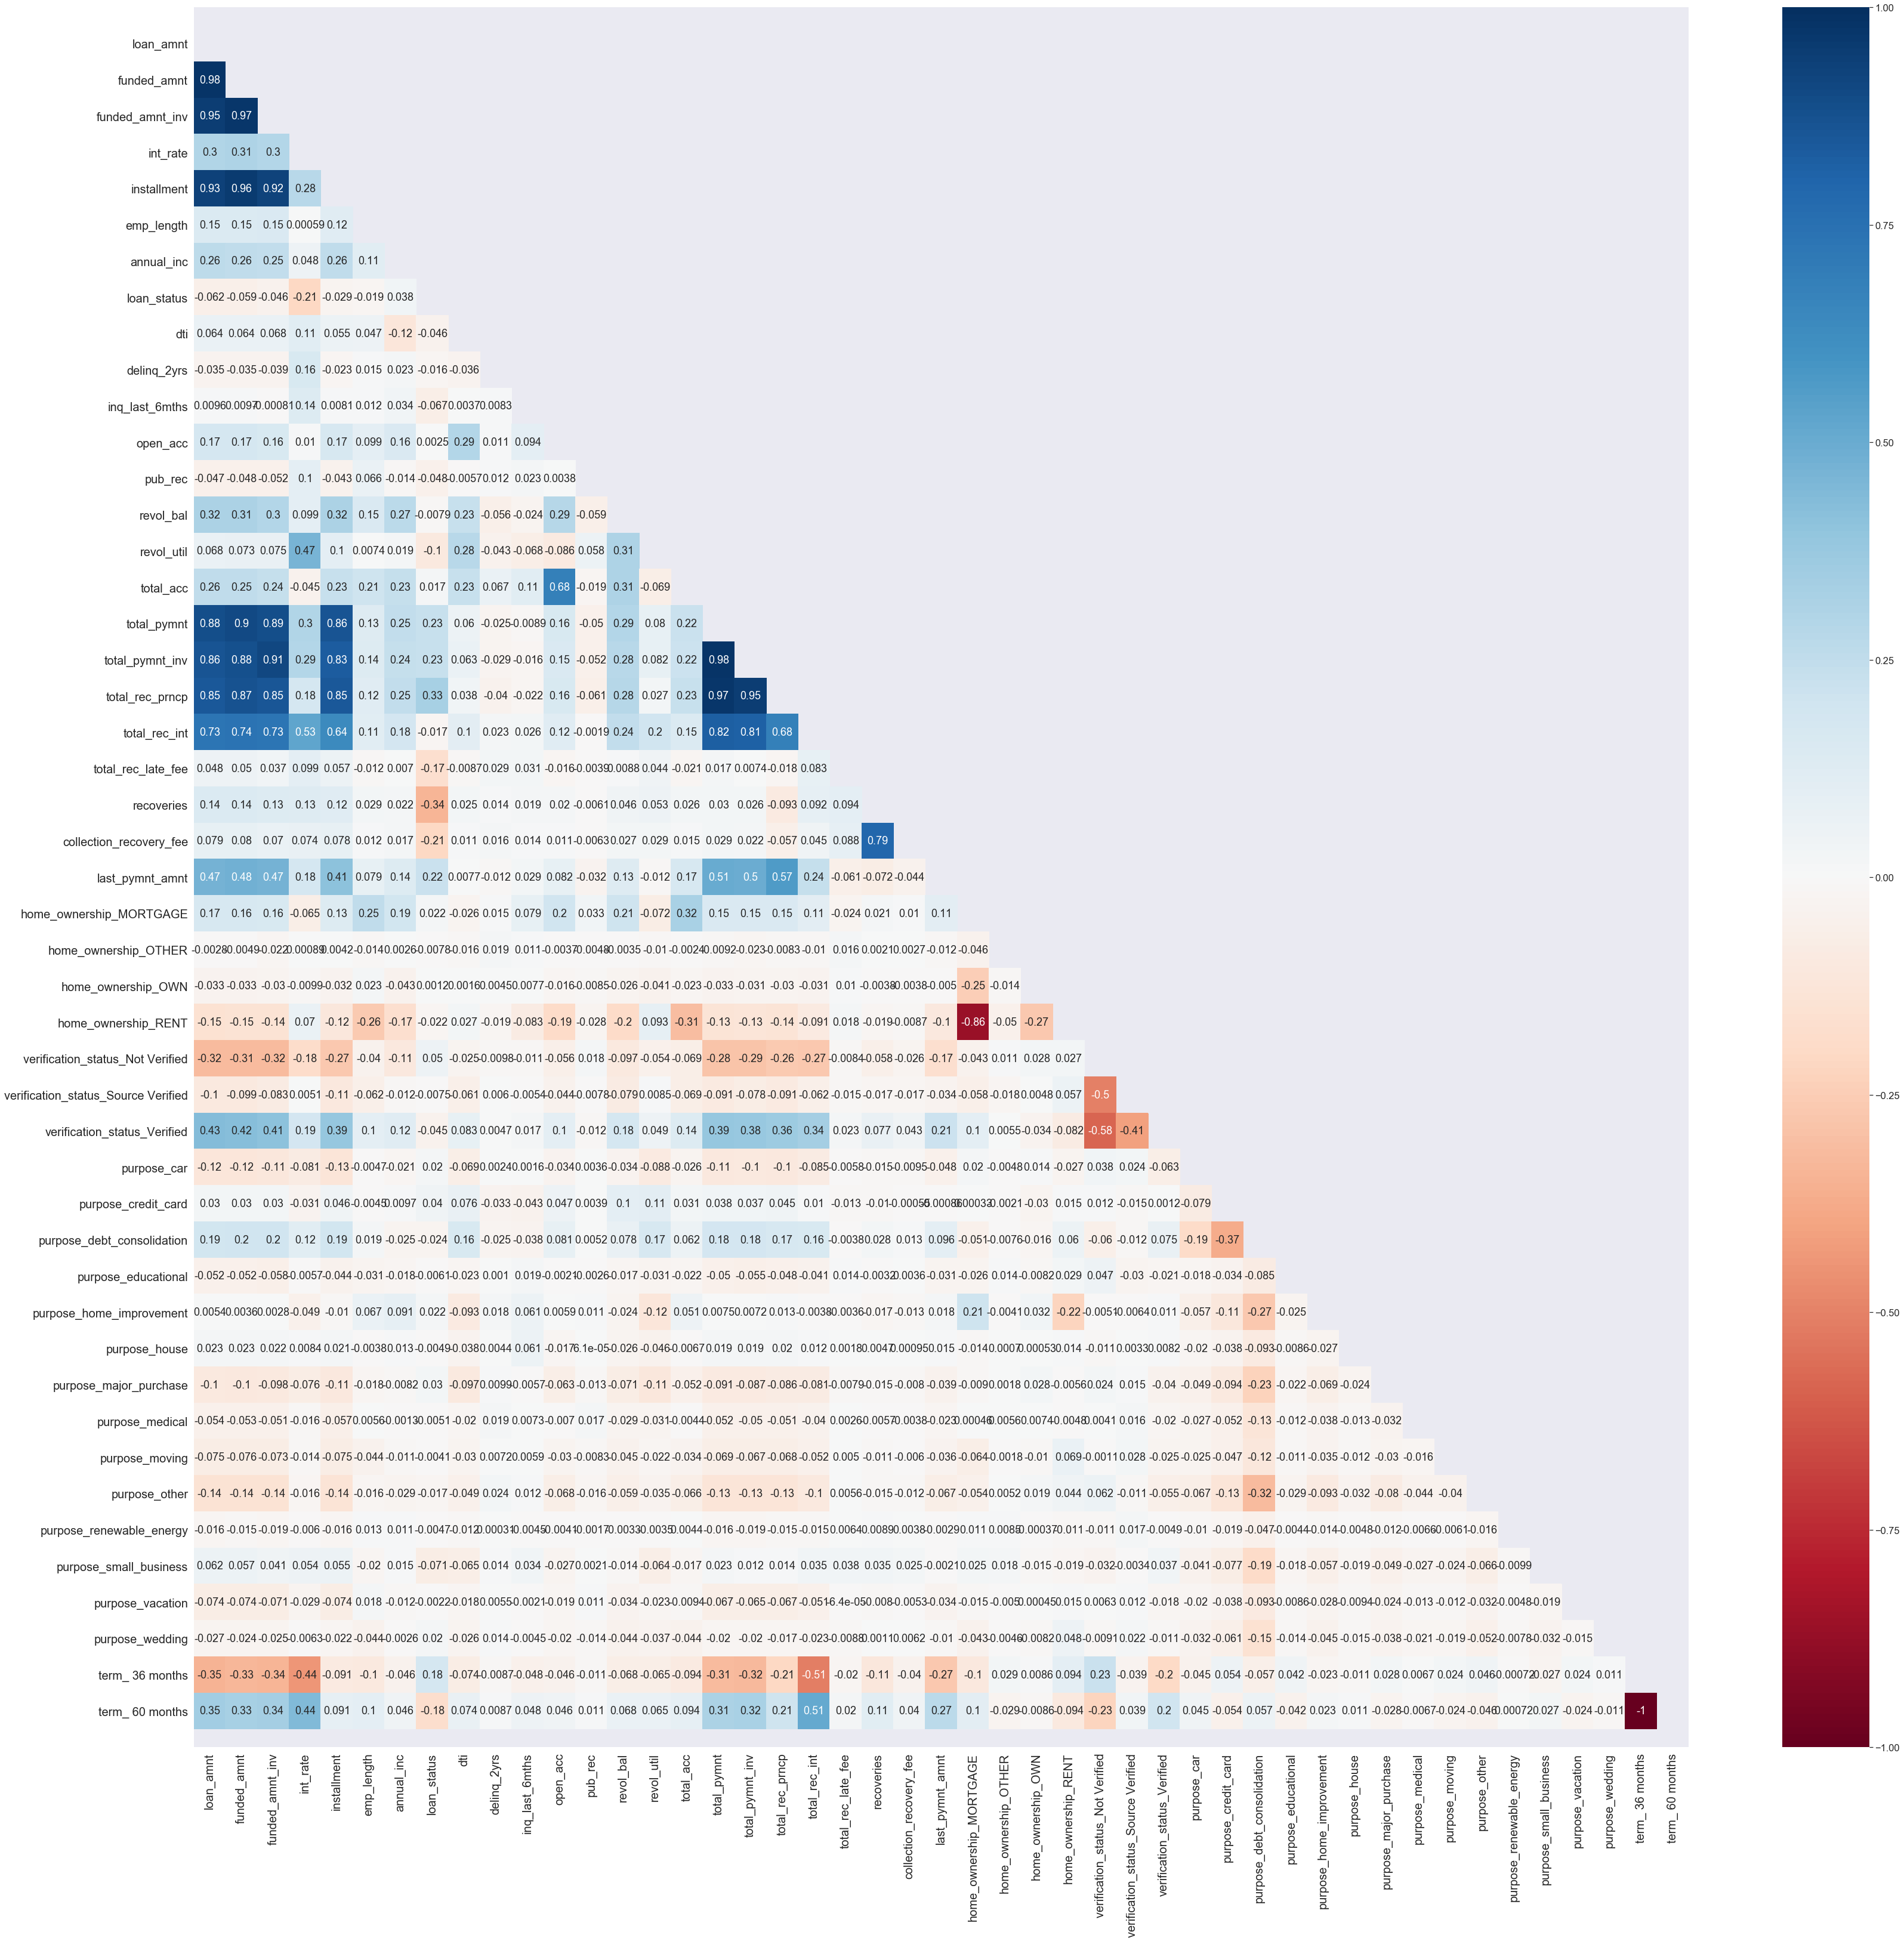

In [37]:
#Using Seaborn's heatmap with to visualize correlations between all numeric features

fig, ax = plt.subplots(figsize=(50,50))
mask = np.zeros_like(numeric_features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(numeric_features.corr(), annot=True, cmap="RdBu", mask=mask, ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20)
plt.show()

### Modeling

In [38]:
predictions = pd.Series(np.ones(loans.shape[0]))
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
predictions[tp_filter]

3        1.0
5        1.0
6        1.0
7        1.0
10       1.0
        ... 
35543    1.0
35544    1.0
35545    1.0
35546    1.0
35547    1.0
Length: 27655, dtype: float64

In [39]:
# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

In [40]:
# Set up relationship for 'interaction'
loans['interaction'] = loans['dti'] * loans['int_rate']

In [41]:
# Set up X and y.

X = loans[['interaction','dti', 'int_rate']]
y = loans['loan_status']

In [42]:
# Import train_test_split.
#from sklearn.model_selection import train_test_split

# Conduct a train/test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [43]:
# Instantiate model.
lr = LogisticRegression()

In [44]:
# Fit model.
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Generate predictions.
preds = lr.predict(X_test)

In [46]:
# Generate confusion matrix
confusion_matrix(y_test, # True values.
                 preds)  # Predicted values

array([[   0, 1221],
       [   3, 7663]], dtype=int64)

In [47]:
# Save tn/fp/fn/tp values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [48]:
cols = loans.columns
# Remove the loan_status column
train_cols = cols.drop("loan_status")
# Create a Dataframe named features containing only feature columns
features = loans[train_cols]
# Create a Series named target that contains just the target column (loan_status)
target = loans["loan_status"]
# Use the fit method of lr to fit a logistic regression to features and target
lr.fit(features, target)


C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Use the predict method of lr to make predictions on features
predictions = lr.predict(features)

In [50]:
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)
# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])
# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = fp / (fp + tn)

print(f'cross_val_Sensitivity: {round(true_positive_rate_sensitivity,4)}')
print(f'cross_val_Specificity: {round(true_negative_rate_specificity,4)}')

C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

cross_val_Sensitivity: 0.8634
cross_val_Specificity: 0.8595


C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
lr = LogisticRegression(class_weight="balanced")
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = fp / (fp + tn)

print(f'LogisticRegression_class_weight_balanced_Sensitivity: {round(true_positive_rate_sensitivity,4)}')
print(f'LogisticRegression_class_weight_balanced_Specificity: {round(true_negative_rate_specificity,4)}')

C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression_class_weight_balanced_Sensitivity: 0.8624
LogisticRegression_class_weight_balanced_Specificity: 0.8586


C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
penalty = {
    0: 10,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = fp / (fp + tn)

print(f'LogisticRegression_class_weight_penalty_Sensitivity: {round(true_positive_rate_sensitivity,4)}')
print(f'LogisticRegression_class_weight_penalty_Specificity: {round(true_negative_rate_specificity,4)}')

C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression_class_weight_penalty_Sensitivity: 0.8623
LogisticRegression_class_weight_penalty_Specificity: 0.8586


C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
#RandomForestClassifer modeling
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
predictions = cross_val_predict(rf, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.`
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = fp / (fp + tn)

print(f'RandomForest_Sensitivity: {round(true_positive_rate_sensitivity,4)}')
print(f'RandomForest_Specificity: {round(true_negative_rate_specificity,4)}')

RandomForest_Sensitivity: 0.8671
RandomForest_Specificity: 0.8632
